#### Loading Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from tqdm import tqdm 

pd.set_option("max_rows",1000000)
pd.set_option("max_columns",100)

In [4]:
df = pd.read_csv('EV_Title_and_Registration_Activity_Govt.csv',sep=",")

In [40]:
df.head()

Clean Alternative Fuel Vehicle Type  VIN (1-10)  Model Year       Make  \
0  Plug-in Hybrid Electric Vehicle (PHEV)  1G1RB6S55J        2018  CHEVROLET   
1  Plug-in Hybrid Electric Vehicle (PHEV)  1G1RA6S50H        2017  CHEVROLET   
2  Plug-in Hybrid Electric Vehicle (PHEV)  1G1RA6S50H        2017  CHEVROLET   
3          Battery Electric Vehicle (BEV)  1N4AZ0CP9D        2013     NISSAN   
4  Plug-in Hybrid Electric Vehicle (PHEV)  1G1RA6S54H        2017  CHEVROLET   

  Model New or Used Vehicle  Sale Price DOL Transaction Date  \
0  Volt                Used           0         July 01 2019   
1  Volt                 New           0         June 30 2016   
2  Volt                 New           0         June 30 2016   
3  Leaf                Used           0          May 06 2015   
4  Volt                Used           0        April 18 2019   

        Transaction Type  Transaction Year Electric Vehicle Fee Paid  \
0   Registration Renewal              2019                       Yes   
1  Original Registration              2016                        No   
2         Original Title              2016            Not Applicable   
3   Registration Renewal              2015                       Yes   
4   Registration Renewal              2019                       Yes   

     County     City    Zip  Electric Range  Base MSRP  \
0  Thurston  OLYMPIA  98501              53          0   
1      King  BOTHELL  98011              53          0   
2      King  BOTHELL  98011              53          0   
3      King   DUVALL  98019              75          0   
4      King  REDMOND  98053              53          0   

                  2015 HB 2778 Exemption Eligibility     Sale Date  \
0  TRANSACTION NOT ELIGIBLE: Non-sale, registrati...           NaN   
1  TRANSACTION NOT ELIGIBLE: Non-sale, registrati...  June 19 2016   
2  CANNOT DETERMINE ELIGIBILITY: Base MSRP has no...  June 19 2016   
3  TRANSACTION NOT ELIGIBLE: Non-sale, registrati...           NaN   
4  TRANSACTION NOT ELIGIBLE: Non-sale, registrati...           NaN   

  Vehicle Primary Use State of Residence  DOL Vehicle ID  \
0           Passenger                 WA       290959301   
1           Passenger                 WA       215759750   
2           Passenger                 WA       215759750   
3           Passenger                 WA       227913206   
4           Passenger                 WA       190099227   

   Legislative District  \
0                    22   
1                     1   
2                     1   
3                     5   
4                    45   

  2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0  TRANSACTION NOT ELIGIBLE: Non-sale, registrati...               
1  TRANSACTION NOT ELIGIBLE: Non-sale, registrati...               
2  TRANSACTION NOT ELIGIBLE: Sale before August 2...               
3  TRANSACTION NOT ELIGIBLE: Non-sale, registrati...               
4  TRANSACTION NOT ELIGIBLE: Non-sale, registrati...               

   Meets 2019 HB 2042 Electric Range Requirement  \
0                                           True   
1                                           True   
2                                           True   
3                                           True   
4                                           True   

   Meets 2019 HB 2042 Sale Date Requirement  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   Meets 2019 HB 2042 Sale Price/Value Requirement  Odometer Reading  \
0                                            False                 0   
1                                            False                 6   
2                                            False                 6   
3                                            False                15   
4                                            Fal

In [7]:
df.shape

(523595, 30)

In [8]:
df.describe()

Model Year    Sale Price  Transaction Year            Zip  \
count  523595.000000  5.235950e+05     523595.000000  523572.000000   
mean     2016.570951  8.822565e+03       2018.679928   98091.649345   
std         2.874726  2.714242e+04          2.382331    3193.981785   
min      1993.000000  0.000000e+00       2010.000000     745.000000   
25%      2014.000000  0.000000e+00       2017.000000   98045.000000   
50%      2017.000000  0.000000e+00       2019.000000   98117.000000   
75%      2019.000000  0.000000e+00       2021.000000   98362.000000   
max      2022.000000  1.231202e+07       2022.000000   99901.000000   

       Electric Range      Base MSRP  DOL Vehicle ID  Legislative District  \
count   523595.000000  523595.000000    5.235950e+05         521464.000000   
mean       108.991161    4223.566621    2.026934e+08             30.305651   
std         92.283287   16076.206669    1.086169e+08             14.686641   
min          0.000000       0.000000    4.000000e+00              1.000000   
25%         26.000000       0.000000    1.349283e+08             20.000000   
50%         81.000000       0.000000    1.815170e+08             34.000000   
75%        208.000000       0.000000    2.494407e+08             43.000000   
max        337.000000  845000.000000    4.792548e+08             49.000000   

       Odometer Reading  
count     523595.000000  
mean        3072.987513  
std        11513.433071  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%           15.000000  
max       888830.000000

In [39]:
df.dtypes

Clean Alternative Fuel Vehicle Type                               object
VIN (1-10)                                                        object
Model Year                                                         int64
Make                                                              object
Model                                                             object
New or Used Vehicle                                               object
Sale Price                                                         int64
DOL Transaction Date                                              object
Transaction Type                                                  object
Transaction Year                                                   int64
Electric Vehicle Fee Paid                                         object
County                                                            object
City                                                              object
Zip                                                

#### Dealing with missing values and cleaning data

In [9]:
missing_vals = df.isnull().sum()/len(df)*100

In [10]:
m = []
for i in range (len(missing_vals)):
    m.append((missing_vals.index[i],missing_vals[i]))

In [11]:
missing_df = pd.DataFrame(m,columns =['Column Name','Missing Value %'])
missing_df = missing_df[missing_df['Missing Value %']>0]

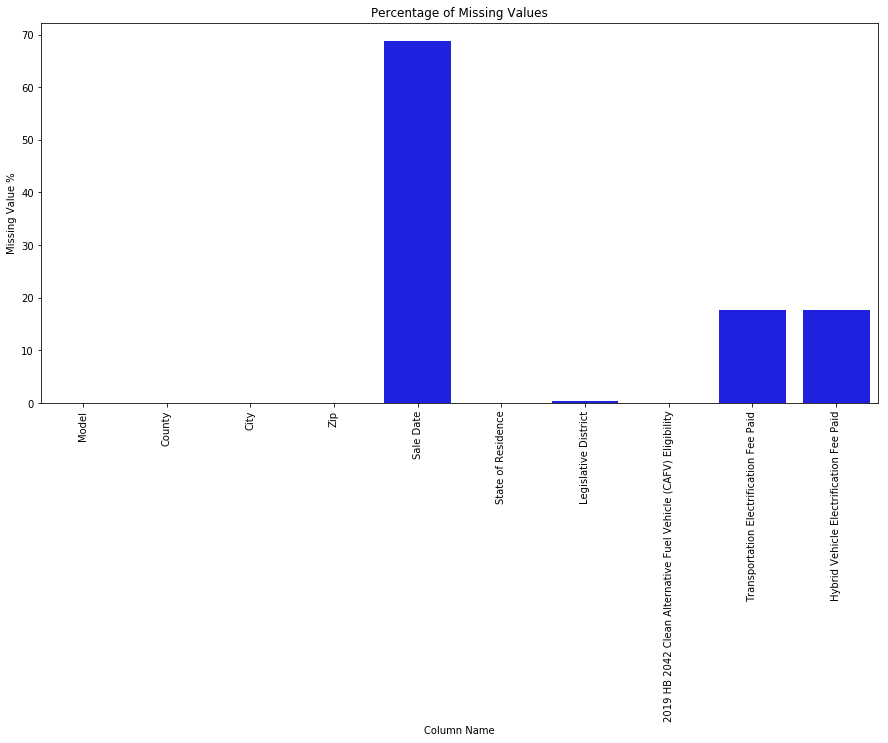

In [12]:
plt.figure(figsize = (15, 7))
g =sns.barplot(x='Column Name',y='Missing Value %',data = missing_df,color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title("Percentage of Missing Values")
plt.show()

In [13]:
missing_df

Column Name  Missing Value %
4                                               Model         0.006494
11                                             County         0.077541
12                                               City         0.010122
13                                                Zip         0.004393
17                                          Sale Date        68.834500
19                                 State of Residence         0.085944
21                               Legislative District         0.406994
22  2019 HB 2042 Clean Alternative Fuel Vehicle (C...         0.011650
28            Transportation Electrification Fee Paid        17.680268
29            Hybrid Vehicle Electrification Fee Paid        17.680268

In [14]:
df.County.value_counts()/len(df)*100

King                    53.934243
Snohomish               10.723746
Pierce                   7.598812
Clark                    5.375529
Kitsap                   3.636207
Thurston                 3.416572
Whatcom                  2.606977
Spokane                  2.250785
Benton                   1.156237
Island                   1.138666
Skagit                   1.096458
Clallam                  0.653750
Jefferson                0.642099
San Juan                 0.601419
Mason                    0.500196
Chelan                   0.491219
Cowlitz                  0.478805
Yakima                   0.462571
Lewis                    0.393434
Grays Harbor             0.356382
Franklin                 0.293929
Kittitas                 0.237779
Grant                    0.237588
Walla Walla              0.233768
Douglas                  0.194234
Klickitat                0.153936
Whitman                  0.144386
Stevens                  0.117266
Pacific                  0.116502
Okanogan      

In [15]:
df.County.fillna(df.County.mode().iloc[0],inplace=True)

In [16]:
df.County.isnull().sum()

0

In [17]:
df.City.value_counts()/len(df)*100

SEATTLE                     18.448610
BELLEVUE                     5.601467
REDMOND                      4.281553
VANCOUVER                    3.371117
KIRKLAND                     3.266265
SAMMAMISH                    3.169434
BOTHELL                      2.862327
RENTON                       2.387914
OLYMPIA                      2.278670
TACOMA                       2.174391
BELLINGHAM                   1.799100
ISSAQUAH                     1.685081
WOODINVILLE                  1.610405
MERCER ISLAND                1.598755
EVERETT                      1.428776
SPOKANE                      1.357347
KENT                         1.319722
LYNNWOOD                     1.266437
BAINBRIDGE ISLAND            1.208377
EDMONDS                      1.205321
SHORELINE                    1.161394
SNOHOMISH                    1.085572
AUBURN                       1.011660
GIG HARBOR                   1.003065
FEDERAL WAY                  0.765095
CAMAS                        0.714865
PUYALLUP    

In [18]:
df.City.fillna(df.City.mode().iloc[0],inplace=True)
df.City.isnull().sum()

0

In [19]:
df.Zip.value_counts()/len(df)*100

98052.0    2.883526
98033.0    1.852577
98004.0    1.800246
98115.0    1.764150
98072.0    1.651467
98006.0    1.612124
98040.0    1.598755
98012.0    1.593598
98103.0    1.481298
98074.0    1.464491
98053.0    1.405858
98034.0    1.312274
98075.0    1.221555
98110.0    1.208377
98112.0    1.096840
98117.0    1.087864
98029.0    1.081943
98027.0    1.076977
98008.0    1.013761
98059.0    1.012042
98109.0    0.932018
98021.0    0.919986
98125.0    0.903179
98105.0    0.897449
98122.0    0.893248
98005.0    0.873194
98118.0    0.853713
98133.0    0.819909
98155.0    0.810168
98144.0    0.797754
98199.0    0.778846
98011.0    0.768151
98501.0    0.765859
98177.0    0.742941
98026.0    0.724606
98607.0    0.717157
98107.0    0.698059
98028.0    0.686217
98116.0    0.674185
98007.0    0.665591
98056.0    0.664636
98225.0    0.650694
98036.0    0.644200
98058.0    0.633887
98208.0    0.621282
98031.0    0.620900
98042.0    0.617271
98119.0    0.613260
98229.0    0.594734
98038.0    0.589387


In [20]:
df.Zip.fillna(df.Zip.mode().iloc[0],inplace=True)
df.Zip.isnull().sum()

0

In [21]:
df.Zip = df.Zip.astype('int64')

In [22]:
df.Zip.dtypes

dtype('int64')

In [23]:
df['State of Residence'].value_counts()/len(df)*100

WA    99.509545
CA     0.092438
VA     0.042399
TX     0.030558
OR     0.025783
MD     0.024637
FL     0.018144
GA     0.015279
AZ     0.011841
NV     0.008785
IL     0.008594
CO     0.007830
NC     0.007639
NJ     0.007449
NY     0.007067
MI     0.006685
HI     0.005539
TN     0.005348
MA     0.005348
ID     0.004966
PA     0.004966
DC     0.004775
AK     0.004775
MT     0.004393
IN     0.004011
CT     0.003629
MN     0.003629
MO     0.003629
OK     0.003056
NM     0.003056
UT     0.002865
DE     0.002674
AL     0.002483
NE     0.002483
LA     0.002483
OH     0.002292
SC     0.002101
WI     0.001910
KS     0.001528
KY     0.001337
MS     0.001337
NH     0.001146
ND     0.000764
PR     0.000764
WY     0.000764
SD     0.000573
AR     0.000382
RI     0.000382
Name: State of Residence, dtype: float64

In [24]:
df['State of Residence'].fillna(df['State of Residence'].mode().iloc[0],inplace=True)
df['State of Residence'].isnull().sum()

0

In [25]:
df['Legislative District'].value_counts()/len(df)*100

41.0    7.076271
45.0    6.931884
48.0    6.314422
36.0    4.782322
46.0    4.504054
5.0     4.217382
1.0     4.150536
43.0    4.139650
34.0    3.241246
37.0    3.177456
32.0    2.597618
23.0    2.524279
40.0    2.338831
18.0    2.317440
21.0    2.313620
22.0    2.225002
11.0    2.202466
44.0    2.169998
26.0    1.918277
10.0    1.771025
47.0    1.533437
31.0    1.502688
17.0    1.502497
42.0    1.492566
24.0    1.490274
27.0    1.474995
35.0    1.428394
49.0    1.414452
33.0    1.413115
28.0    1.300624
39.0    1.202074
2.0     1.167505
30.0    1.133319
25.0    1.084617
38.0    1.059407
8.0     0.998482
20.0    0.851230
6.0     0.789160
12.0    0.769488
29.0    0.675713
4.0     0.660434
19.0    0.592825
14.0    0.541831
3.0     0.507453
13.0    0.496376
9.0     0.495612
16.0    0.465054
7.0     0.432204
15.0    0.203401
Name: Legislative District, dtype: float64

In [26]:
df['Legislative District'].fillna(df['Legislative District'].mode().iloc[0],inplace=True)
df['Legislative District'].isnull().sum()

0

In [27]:
df['Legislative District'] = df['Legislative District'].astype('int64')

In [28]:
df['2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()/len(df)*100

TRANSACTION NOT ELIGIBLE: Non-sale, registration transaction                                                                                                                                                               55.147394
VEHICLE MODEL NOT ELIGIBLE: Low battery range; TRANSACTION NOT ELIGIBLE: Non-sale, registration transaction                                                                                                                12.058557
ERROR: No battery range; TRANSACTION NOT ELIGIBLE: Non-sale, registration transaction                                                                                                                                       5.803531
TRANSACTION NOT ELIGIBLE: Sale before August 2019; CAUTION: Sale price not available                                                                                                                                        4.665438
TRANSACTION NOT ELIGIBLE: Sale before August 2019                                   

In [29]:
df['2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility'].fillna(df['2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility'].mode().iloc[0],inplace=True)
df['2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility'].isnull().sum()

0

In [30]:
df['Transportation Electrification Fee Paid'].value_counts()/len(df)*100

No                37.649137
Yes               23.305226
Not Applicable    21.365368
Name: Transportation Electrification Fee Paid, dtype: float64

In [31]:
df['Transportation Electrification Fee Paid'].fillna('Not Mentioned',inplace=True)
df['Transportation Electrification Fee Paid'].isnull().sum()

0

In [32]:
df['Hybrid Vehicle Electrification Fee Paid'].value_counts()/len(df)*100

No                55.842206
Not Applicable    21.365368
Yes                5.112157
Name: Hybrid Vehicle Electrification Fee Paid, dtype: float64

In [33]:
df['Hybrid Vehicle Electrification Fee Paid'].fillna('Not Mentioned',inplace=True)
df['Hybrid Vehicle Electrification Fee Paid'].isnull().sum()

0

In [34]:
df.isnull().sum()[df.isnull().sum()>0]

Model            34
Sale Date    360414
dtype: int64

In [35]:
#Sale Date has 67% missing values but we cannot lose the data. We assume that the Sale Date is only available for cars that have been sold and then registered.
#Sale price is set to 0 as it indicates that the sale price was not available.

In [36]:
df['Sale Price'].value_counts()/len(df)*100

0           79.747897
35000        0.216962
51290        0.128916
54290        0.124715
53290        0.124524
52290        0.124333
55290        0.115547
56000        0.096449
56290        0.086517
57290        0.081743
58290        0.077923
52190        0.071811
41290        0.071620
49000        0.071238
63290        0.066464
62290        0.063981
51190        0.063217
56190        0.062835
55190        0.061498
41190        0.061498
42290        0.060161
59290        0.059588
40190        0.059588
40290        0.050230
54190        0.050039
50290        0.049848
53190        0.049466
57190        0.048511
60290        0.048511
64290        0.048320
39290        0.047365
51000        0.047174
50190        0.046601
61290        0.046601
40790        0.045455
55000        0.045264
49290        0.044500
44999        0.044309
63190        0.044309
52440        0.042781
41790        0.042017
52790        0.041253
42190        0.040298
62190        0.039725
57500        0.039152
10000     

In [41]:
for i in tqdm(range(len(df))):
    df['Sale Date'][i] = str(df['Sale Date'][i]).replace('nan','unavailable')

  0%|                                                                                       | 0/523595 [00:00<?, ?it/s]C:\Users\Dhruv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|█████████████████████████████████████████████████████████████████████████| 523595/523595 [16:37<00:00, 525.13it/s]


#### Dataframe for Sales

In [42]:
df_sales = df[df['Sale Date'] != 'unavailable']

In [43]:
df_sales.shape

(163181, 30)

In [44]:
df_sales = df_sales[df_sales['Sale Price']>0]

In [45]:
df_sales.shape

(106039, 30)

In [46]:
df_sales = df_sales[['DOL Vehicle ID','Make','Model','Model Year','New or Used Vehicle','Sale Price','Sale Date']]

In [47]:
df_sales = df_sales.drop_duplicates(keep = 'first')

In [48]:
df_sales = df_sales.reset_index()
df_sales.drop('index',axis = 1, inplace = True)

In [49]:
df_sales.head(5)

DOL Vehicle ID   Make    Model  Model Year New or Used Vehicle  Sale Price  \
0       151705347  TESLA  Model S        2016                Used       53000   
1       447270232    BMW       i3        2019                 New       45970   
2       249681736  TESLA  Model 3        2019                 New       49600   
3       305739780  TESLA  Model 3        2019                 New       57600   
4       475427319  TESLA  Model 3        2019                 New       52410   

       Sale Date  
0  April 11 2019  
1  March 03 2019  
2   June 05 2019  
3  March 02 2019  
4  March 30 2019

In [50]:
df_sales.shape

(105141, 7)

In [51]:
df_sales.nunique()

DOL Vehicle ID         93503
Make                      34
Model                    114
Model Year                18
New or Used Vehicle        2
Sale Price             26375
Sale Date               1961
dtype: int64

In [52]:
df_sales.dtypes

DOL Vehicle ID          int64
Make                   object
Model                  object
Model Year              int64
New or Used Vehicle    object
Sale Price              int64
Sale Date              object
dtype: object

In [53]:
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('January', '01'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('February', '02'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('March', '03'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('April', '04'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('May', '05'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('June', '06'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('July', '07'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('August', '08'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('September', '09'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('October', '10'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('November', '11'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace('December', '12'))
df_sales['Sale Date'] = df_sales['Sale Date'].apply(lambda row: row.replace(' ', '/'))

In [54]:
df_sales.head()

DOL Vehicle ID   Make    Model  Model Year New or Used Vehicle  Sale Price  \
0       151705347  TESLA  Model S        2016                Used       53000   
1       447270232    BMW       i3        2019                 New       45970   
2       249681736  TESLA  Model 3        2019                 New       49600   
3       305739780  TESLA  Model 3        2019                 New       57600   
4       475427319  TESLA  Model 3        2019                 New       52410   

    Sale Date  
0  04/11/2019  
1  03/03/2019  
2  06/05/2019  
3  03/02/2019  
4  03/30/2019

In [55]:
df_sales['Sale Date'] = pd.to_datetime(df_sales['Sale Date'])

In [56]:
df_sales.dtypes

DOL Vehicle ID                  int64
Make                           object
Model                          object
Model Year                      int64
New or Used Vehicle            object
Sale Price                      int64
Sale Date              datetime64[ns]
dtype: object

In [57]:
df_sales['Make'] = df_sales['Make'].str.title()
df_sales['Model'] = df_sales['Model'].str.title()

In [58]:
df_sales.head()

DOL Vehicle ID   Make    Model  Model Year New or Used Vehicle  Sale Price  \
0       151705347  Tesla  Model S        2016                Used       53000   
1       447270232    Bmw       I3        2019                 New       45970   
2       249681736  Tesla  Model 3        2019                 New       49600   
3       305739780  Tesla  Model 3        2019                 New       57600   
4       475427319  Tesla  Model 3        2019                 New       52410   

   Sale Date  
0 2019-04-11  
1 2019-03-03  
2 2019-06-05  
3 2019-03-02  
4 2019-03-30

#### Dataframe from Vehicles

In [205]:
df['DOL Vehicle ID'].duplicated().sum() #duplicate rows since the data is based on transaction

408981

In [206]:
df_vehicle = df[df['Transaction Type']== 'Original Title'] #new data frame with title transaction

In [207]:
df_vehicle.shape

(113206, 30)

In [208]:
df_vehicle['DOL Vehicle ID'].value_counts()

114760943    3
100251602    3
475402098    2
349611097    2
138183839    2
254555073    2
192656628    2
458770770    2
127418707    2
475061632    2
266574710    2
272392767    2
166168222    2
475475353    2
192357784    2
350012127    2
304456533    2
6235631      2
102564087    2
302792297    2
230512222    2
115676137    2
474291142    2
123782137    2
330798968    2
214088990    2
132538010    2
350141788    2
186641927    2
159805824    2
350008025    2
136526764    2
300293815    2
142625717    2
186299319    2
304573552    2
475564498    2
477228524    2
127244722    2
254470968    2
112486608    2
114554359    2
104155124    2
230648246    2
207672587    2
236841307    2
349228302    2
286740247    2
113291041    2
349869544    2
112733442    2
150421435    2
118345006    2
317285       2
148837902    2
106241495    2
167805263    2
204658303    2
246820892    2
2276158      2
474327794    2
302602198    2
348145199    2
179765099    2
325687575    2
151938909    2
2683355   

In [209]:
df_vehicle = df_vehicle.sort_values(by = ['Transaction Year','DOL Vehicle ID']) #sorting dataframe so that we can get the first Transaction

In [210]:
df_vehicle['DOL Vehicle ID'].duplicated().sum() #yet some duplicates

817

In [211]:
df_vehicle= df_vehicle.drop_duplicates(subset=['DOL Vehicle ID'],keep = 'first') #removing duplicates

In [212]:
df_vehicle['DOL Vehicle ID'].duplicated().sum()# we have dataframe with all unique vehicle data

0

In [213]:
df_vehicle.columns

Index(['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'Model Year',
       'Make', 'Model', 'New or Used Vehicle', 'Sale Price',
       'DOL Transaction Date', 'Transaction Type', 'Transaction Year',
       'Electric Vehicle Fee Paid', 'County', 'City', 'Zip', 'Electric Range',
       'Base MSRP', '2015 HB 2778 Exemption Eligibility', 'Sale Date',
       'Vehicle Primary Use', 'State of Residence', 'DOL Vehicle ID',
       'Legislative District',
       '2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Meets 2019 HB 2042 Electric Range Requirement',
       'Meets 2019 HB 2042 Sale Date Requirement',
       'Meets 2019 HB 2042 Sale Price/Value Requirement', 'Odometer Reading',
       'Odometer Code', 'Transportation Electrification Fee Paid',
       'Hybrid Vehicle Electrification Fee Paid'],
      dtype='object')

In [214]:
df_vehicle = df_vehicle[['DOL Vehicle ID','Make','Model','Model Year','Clean Alternative Fuel Vehicle Type','County', 'City', 'Zip','State of Residence','Legislative District','Vehicle Primary Use','Electric Range']]

In [215]:
df_vehicle = df_vehicle.reset_index()
df_vehicle.drop('index',axis = 1, inplace = True)

In [216]:
df_vehicle.head()

DOL Vehicle ID                  Make        Model  Model Year  \
0         2343918                 TESLA     Roadster        2010   
1         5880752                  FORD       Ranger        1998   
2         6507896             CHEVROLET  S-10 Pickup        1998   
3       104423070  WHEEGO ELECTRIC CARS         LIFE        2011   
4       106169542                 TESLA     Roadster        2010   

  Clean Alternative Fuel Vehicle Type   County        City    Zip  \
0      Battery Electric Vehicle (BEV)     King    KIRKLAND  98033   
1      Battery Electric Vehicle (BEV)  Whatcom  BELLINGHAM  98225   
2      Battery Electric Vehicle (BEV)     King     SEATTLE  98144   
3      Battery Electric Vehicle (BEV)     King     SEATTLE  98116   
4      Battery Electric Vehicle (BEV)    Clark   VANCOUVER  98664   

  State of Residence  Legislative District            Vehicle Primary Use  \
0                 WA                    48                      Passenger   
1                 WA                    42                          Truck   
2                 WA                    37                          Truck   
3                 WA                    34  Medium-Speed Electric Vehicle   
4                 WA                    49                      Passenger   

   Electric Range  
0             245  
1              58  
2              33  
3             100  
4             245

In [217]:
df_vehicle.shape

(112389, 12)

In [218]:
df_vehicle.nunique()

DOL Vehicle ID                         112389
Make                                       36
Model                                     123
Model Year                                 22
Clean Alternative Fuel Vehicle Type         2
County                                    113
City                                      644
Zip                                       786
State of Residence                         39
Legislative District                       49
Vehicle Primary Use                        11
Electric Range                            103
dtype: int64

In [219]:
df_vehicle.dtypes

DOL Vehicle ID                          int64
Make                                   object
Model                                  object
Model Year                              int64
Clean Alternative Fuel Vehicle Type    object
County                                 object
City                                   object
Zip                                     int64
State of Residence                     object
Legislative District                    int64
Vehicle Primary Use                    object
Electric Range                          int64
dtype: object

In [220]:
df_vehicle['Make'] = df_vehicle['Make'].str.title()
df_vehicle['Model'] = df_vehicle['Model'].str.title()
df_vehicle['City'] = df_vehicle['City'].str.title()

In [221]:
df_vehicle.head()

DOL Vehicle ID                  Make        Model  Model Year  \
0         2343918                 Tesla     Roadster        2010   
1         5880752                  Ford       Ranger        1998   
2         6507896             Chevrolet  S-10 Pickup        1998   
3       104423070  Wheego Electric Cars         Life        2011   
4       106169542                 Tesla     Roadster        2010   

  Clean Alternative Fuel Vehicle Type   County        City    Zip  \
0      Battery Electric Vehicle (BEV)     King    Kirkland  98033   
1      Battery Electric Vehicle (BEV)  Whatcom  Bellingham  98225   
2      Battery Electric Vehicle (BEV)     King     Seattle  98144   
3      Battery Electric Vehicle (BEV)     King     Seattle  98116   
4      Battery Electric Vehicle (BEV)    Clark   Vancouver  98664   

  State of Residence  Legislative District            Vehicle Primary Use  \
0                 WA                    48                      Passenger   
1                 WA                    42                          Truck   
2                 WA                    37                          Truck   
3                 WA                    34  Medium-Speed Electric Vehicle   
4                 WA                    49                      Passenger   

   Electric Range  
0             245  
1              58  
2              33  
3             100  
4             245

#### Importing Data from Government website 

In [81]:
from sodapy import Socrata

In [82]:
client = Socrata("data.wa.gov", None)

In [83]:
results = client.get("f6w7-q2d2", limit=100000)

In [223]:
results_df = pd.DataFrame.from_records(results)

In [224]:
results_df.head()

vin_1_10     county          city state zip_code model_year       make  \
0  1G1RC6E45F   Thurston        TENINO    WA    98589       2015  CHEVROLET   
1  5YJSA1E26J  Snohomish      MUKILTEO    WA    98275       2018      TESLA   
2  5YJSA1E26K     Camden   SAINT MARYS    GA    31558       2019      TESLA   
3  1G1FW6S03H   Thurston         LACEY    WA    98503       2017  CHEVROLET   
4  1N4AZ0CP6D     Skagit  MOUNT VERNON    WA    98273       2013     NISSAN   

     model                                 ev_type  \
0     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
1  MODEL S          Battery Electric Vehicle (BEV)   
2  MODEL S          Battery Electric Vehicle (BEV)   
3  BOLT EV          Battery Electric Vehicle (BEV)   
4     LEAF          Battery Electric Vehicle (BEV)   

                                 cafv_type electric_range base_msrp  \
0  Clean Alternative Fuel Vehicle Eligible             38         0   
1  Clean Alternative Fuel Vehicle Eligible            249         0   
2  Clean Alternative Fuel Vehicle Eligible            270         0   
3  Clean Alternative Fuel Vehicle Eligible            238         0   
4  Clean Alternative Fuel Vehicle Eligible             75         0   

  legislative_district dol_vehicle_id  \
0                   35      157715015   
1                   21      474398907   
2                  NaN      185220493   
3                   22      196814537   
4                   40      171974470   

                                     geocoded_column        electric_utility  \
0  {'type': 'Point', 'coordinates': [-122.842388,...  PUGET SOUND ENERGY INC   
1  {'type': 'Point', 'coordinates': [-122.302507,...  PUGET SOUND ENERGY INC   
2  {'type': 'Point', 'coordinates': [-81.558651, ...                     NaN   
3  {'type': 'Point', 'coordinates': [-122.80237, ...  PUGET SOUND ENERGY INC   
4  {'type': 'Point', 'coordinates': [-122.355669,...  PUGET SOUND ENERGY INC   

  :@computed_region_8ddd_yn5v :@computed_region_x4ys_rtnd  \
0                          27                        2742   
1                           7                        3213   
2                         NaN                        1157   
3                          28                        2742   
4                          43                        3212   

  :@computed_region_fny7_vc3j  
0                           3  
1                           2  
2                         NaN  
3                          10  
4                           2

In [225]:
results_df = results_df[['dol_vehicle_id','cafv_type','geocoded_column']]

In [226]:
results_df.head(2)

dol_vehicle_id                                cafv_type  \
0      157715015  Clean Alternative Fuel Vehicle Eligible   
1      474398907  Clean Alternative Fuel Vehicle Eligible   

                                     geocoded_column  
0  {'type': 'Point', 'coordinates': [-122.842388,...  
1  {'type': 'Point', 'coordinates': [-122.302507,...

In [227]:
results_df.dtypes

dol_vehicle_id     object
cafv_type          object
geocoded_column    object
dtype: object

In [228]:
results_df.dol_vehicle_id = results_df.dol_vehicle_id.astype('int64')

In [229]:
results_df.dtypes

dol_vehicle_id      int64
cafv_type          object
geocoded_column    object
dtype: object

In [230]:
df_main = df_vehicle.merge(results_df,how = 'left', left_on = 'DOL Vehicle ID', right_on='dol_vehicle_id')

In [231]:
df_main.head()

DOL Vehicle ID                  Make        Model  Model Year  \
0         2343918                 Tesla     Roadster        2010   
1         5880752                  Ford       Ranger        1998   
2         6507896             Chevrolet  S-10 Pickup        1998   
3       104423070  Wheego Electric Cars         Life        2011   
4       106169542                 Tesla     Roadster        2010   

  Clean Alternative Fuel Vehicle Type   County        City    Zip  \
0      Battery Electric Vehicle (BEV)     King    Kirkland  98033   
1      Battery Electric Vehicle (BEV)  Whatcom  Bellingham  98225   
2      Battery Electric Vehicle (BEV)     King     Seattle  98144   
3      Battery Electric Vehicle (BEV)     King     Seattle  98116   
4      Battery Electric Vehicle (BEV)    Clark   Vancouver  98664   

  State of Residence  Legislative District            Vehicle Primary Use  \
0                 WA                    48                      Passenger   
1                 WA                    42                          Truck   
2                 WA                    37                          Truck   
3                 WA                    34  Medium-Speed Electric Vehicle   
4                 WA                    49                      Passenger   

   Electric Range  dol_vehicle_id cafv_type geocoded_column  
0             245             NaN       NaN             NaN  
1              58             NaN       NaN             NaN  
2              33             NaN       NaN             NaN  
3             100             NaN       NaN             NaN  
4             245             NaN       NaN             NaN

In [232]:
df_main['dol_vehicle_id'].fillna(0,inplace=True)

In [233]:
df_main = df_main[df_main['dol_vehicle_id'] != 0]

In [234]:
df_main.shape

(89913, 15)

In [235]:
df_main['dol_vehicle_id'].isnull().sum()

0

In [236]:
df_vehicle = df_main

In [237]:
df_vehicle.drop('dol_vehicle_id',axis = 1, inplace = True)

In [238]:
df_vehicle = df_vehicle.reset_index()
df_vehicle.drop('index',axis = 1, inplace = True)

In [239]:
df_vehicle.head()

DOL Vehicle ID   Make     Model  Model Year  \
0       108886998  Tesla  Roadster        2010   
1       115173376  Tesla  Roadster        2010   
2       123892821  Tesla  Roadster        2010   
3       149731004  Tesla  Roadster        2010   
4       155686436   Ford    Ranger        1999   

  Clean Alternative Fuel Vehicle Type     County          City    Zip  \
0      Battery Electric Vehicle (BEV)       King       Seattle  98112   
1      Battery Electric Vehicle (BEV)       King    North Bend  98045   
2      Battery Electric Vehicle (BEV)       King       Seattle  98121   
3      Battery Electric Vehicle (BEV)  Snohomish      Mukilteo  98275   
4      Battery Electric Vehicle (BEV)     Skagit  Mount Vernon  98274   

  State of Residence  Legislative District Vehicle Primary Use  \
0                 WA                    43           Passenger   
1                 WA                     5           Passenger   
2                 WA                    36           Passenger   
3                 WA                    21           Passenger   
4                 WA                    10               Truck   

   Electric Range                                cafv_type  \
0             245  Clean Alternative Fuel Vehicle Eligible   
1             245  Clean Alternative Fuel Vehicle Eligible   
2             245  Clean Alternative Fuel Vehicle Eligible   
3             245  Clean Alternative Fuel Vehicle Eligible   
4              74  Clean Alternative Fuel Vehicle Eligible   

                                     geocoded_column  
0  {'type': 'Point', 'coordinates': [-122.296466,...  
1  {'type': 'Point', 'coordinates': [-121.668459,...  
2  {'type': 'Point', 'coordinates': [-122.334341,...  
3  {'type': 'Point', 'coordinates': [-122.302507,...  
4  {'type': 'Point', 'coordinates': [-122.250701,...

In [240]:
df_vehicle.rename(columns = {'cafv_type':'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'geocoded_column':'Vehicle Location'}, inplace = True)

In [241]:
df_vehicle['Vehicle Location'][0]

{'type': 'Point', 'coordinates': [-122.296466, 47.631708]}

In [242]:
df_vehicle['Vehicle Location'].isnull().sum()

738

In [243]:
df_vehicle.dropna(inplace=True)

In [250]:
df_vehicle = df_vehicle.reset_index()
df_vehicle.drop('index',axis = 1, inplace = True)

In [244]:
df_vehicle.shape

(89158, 14)

In [245]:
pd.DataFrame.from_dict(df_vehicle['Vehicle Location'][0])

type  coordinates
0  Point  -122.296466
1  Point    47.631708

In [246]:
df_vehicle['Vehicle Location'][0]['coordinates']

[-122.296466, 47.631708]

In [251]:
df_vehicle['Latitude'] = 0.0
df_vehicle['Longitude'] = 0.0

for i in tqdm(range(len(df_vehicle))):
    df_vehicle['Latitude'][i] = df_vehicle['Vehicle Location'][i]['coordinates'][0]
    df_vehicle['Longitude'][i] = df_vehicle['Vehicle Location'][i]['coordinates'][1]

  0%|                                                                                        | 0/89158 [00:00<?, ?it/s]C:\Users\Dhruv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Dhruv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████████████████████████████████████████████████████████████████████| 89158/89158 [00:16<00:00, 5279.98it/s]


In [253]:
df_vehicle.drop('Vehicle Location',axis = 1,inplace=True)

In [254]:
df_vehicle.head()

DOL Vehicle ID   Make     Model  Model Year  \
0       108886998  Tesla  Roadster        2010   
1       115173376  Tesla  Roadster        2010   
2       123892821  Tesla  Roadster        2010   
3       149731004  Tesla  Roadster        2010   
4       155686436   Ford    Ranger        1999   

  Clean Alternative Fuel Vehicle Type     County          City    Zip  \
0      Battery Electric Vehicle (BEV)       King       Seattle  98112   
1      Battery Electric Vehicle (BEV)       King    North Bend  98045   
2      Battery Electric Vehicle (BEV)       King       Seattle  98121   
3      Battery Electric Vehicle (BEV)  Snohomish      Mukilteo  98275   
4      Battery Electric Vehicle (BEV)     Skagit  Mount Vernon  98274   

  State of Residence  Legislative District Vehicle Primary Use  \
0                 WA                    43           Passenger   
1                 WA                     5           Passenger   
2                 WA                    36           Passenger   
3                 WA                    21           Passenger   
4                 WA                    10               Truck   

   Electric Range Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0             245           Clean Alternative Fuel Vehicle Eligible   
1             245           Clean Alternative Fuel Vehicle Eligible   
2             245           Clean Alternative Fuel Vehicle Eligible   
3             245           Clean Alternative Fuel Vehicle Eligible   
4              74           Clean Alternative Fuel Vehicle Eligible   

     Latitude  Longitude  
0 -122.296466  47.631708  
1 -121.668459  47.426482  
2 -122.334341  47.611423  
3 -122.302507  47.911921  
4 -122.250701  48.368138

#### Exporting CSV

In [255]:
df_sales.to_csv('EV Sales.csv')
df_vehicle.to_csv('EV Vehicles.csv')